## Transfer Learning ResNet152V2 using Keras

**Dataset download link**

In [1]:
###https://drive.google.com/drive/folders/1vdr9CC9ChYVW2iXp6PlfyMOGD-4Um1ue

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

**Libaries importing process**

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

**Image Re-Scaling**

In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

**Import the ResNet152V2 library and add preprocessing layer to the front of ResNet**

In [5]:
# Here I will be using imagenet weights
import tensorflow
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 103s 1us/step


**Don't train existing weights**

In [6]:
for layer in resnet.layers:
    layer.trainable = False

**Useful for getting number of output classes**

In [7]:
folders = glob('Datasets/train/*')

**MY layers - you can add more if you want**

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

**View the structure of the model**

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

**Cost and Optimization method to use**

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Use the Image Data Generator to import the images from the dataset**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


## Model Fiting Process 

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 61s 994ms/step - loss: 2.5989 - accuracy: 0.8262 - val_loss: 9.7924 - val_accuracy: 0.1667
Epoch 2/20
61/61 [==============================] - 53s 871ms/step - loss: 0.8603 - accuracy: 0.9293 - val_loss: 7.9450 - val_accuracy: 0.1667
Epoch 3/20
61/61 [==============================] - 57s 937ms/step - loss: 0.9847 - accuracy: 0.9426 - val_loss: 5.6955 - val_accuracy: 0.1667
Epoch 4/20
61/61 [==============================] - 56s 923ms/step - loss: 0.6756 - accuracy: 0.9569 - val_loss: 7.8770 - val_accuracy: 0.1667
Epoch 5/20
61/61 [==============================] - 56s 924ms/step - loss: 0.3075 - accuracy: 0.9739 - val_loss: 10.6988 - val_accuracy: 0.1667
Epoch 6/20
61/61 [==============================] - 56s 919ms/step - loss: 0.3638 - accuracy: 0.9682 - val_loss: 14.9

In [16]:
import matplotlib.pyplot as plt

## Ploting Process 

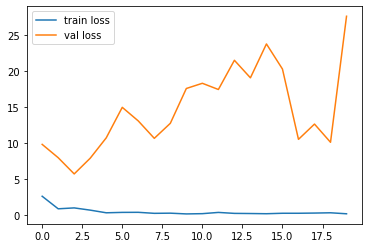

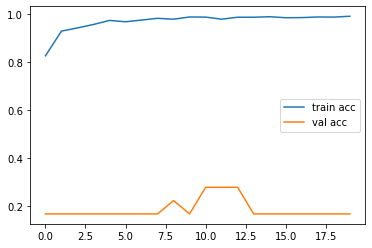

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Model Saiving Process 

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[1.00000000e+00, 8.04314111e-15, 2.19720339e-23, 4.94661023e-09],
       [9.99999881e-01, 9.04611367e-15, 7.42278543e-23, 6.86880526e-08],
       [1.00000000e+00, 4.12136281e-14, 5.92430517e-24, 8.46179737e-10],
       [1.00000000e+00, 6.95809783e-13, 2.56296844e-22, 5.12730303e-09],
       [1.00000000e+00, 2.38383837e-14, 1.89498952e-23, 2.23911978e-09],
       [1.00000000e+00, 9.11940445e-13, 1.09820212e-21, 3.21812110e-09],
       [1.00000000e+00, 3.62222811e-13, 1.97320113e-22, 4.44007719e-10],
       [1.00000000e+00, 1.71554632e-12, 1.57005646e-21, 1.17267518e-09],
       [1.00000000e+00, 7.69796173e-13, 4.88692540e-22, 1.30931710e-09],
       [1.00000000e+00, 4.07133826e-13, 2.70634246e-22, 4.68927175e-10],
       [9.99999881e-01, 5.09553104e-16, 9.44079828e-23, 1.13902416e-07],
       [1.00000000e+00, 7.30314572e-13, 1.15440607e-21, 4.07724476e-09],
       [1.00000000e+00, 1.59832014e-13, 1.09438345e-22, 3.21198890e-09],
       [1.00000000e+00, 5.22983620e-13, 1.28156490e

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

In [25]:
img=image.load_img('Datasets/test/diseased cotton plant/dd (41).jpg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[ 97.,  82.,  61.],
        [ 71.,  59.,  37.],
        [ 98.,  83.,  62.],
        ...,
        [ 89., 149.,  63.],
        [ 91., 154.,  63.],
        [ 92., 154.,  68.]],

       [[ 63.,  54.,  37.],
        [ 54.,  46.,  33.],
        [ 68.,  59.,  42.],
        ...,
        [ 88., 150.,  64.],
        [ 89., 152.,  63.],
        [ 82., 144.,  58.]],

       [[ 48.,  38.,  26.],
        [ 58.,  49.,  34.],
        [ 76.,  67.,  50.],
        ...,
        [ 93., 153.,  67.],
        [ 82., 145.,  56.],
        [ 90., 150.,  64.]],

       ...,

       [[ 54.,  47.,  29.],
        [ 52.,  47.,  28.],
        [ 57.,  50.,  32.],
        ...,
        [ 38.,  38.,  26.],
        [ 36.,  34.,  22.],
        [ 50.,  46.,  34.]],

       [[ 58.,  51.,  35.],
        [ 34.,  31.,  14.],
        [ 50.,  44.,  28.],
        ...,
        [ 68.,  62.,  46.],
        [ 41.,  38.,  23.],
        [ 44.,  38.,  26.]],

       [[ 63.,  69.,  35.],
        [ 41.,  38.,  21.],
        [ 29.,  

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

array([[7.7631595e-03, 9.3520057e-06, 1.1813201e-21, 9.9222749e-01]],
      dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a==1

array([False])

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.1.0'